## **INTERPRETAÇÃO DOS RESULTADOS**
Esta etapa do projeto consiste na avaliação e interpretação dos dados extraídos da análise do dataset, com o objetivo de compreender de forma aprofundada os resultados obtidos. Serão analisados **comportamento dos modelos e a eficácia de cada um deles, a análise exploratória dos dados, as técnicas de pré-processamento**, além de **discutir padrões, possíveis discrepâncias e resultados inesperados.** Também serão apresentadas **recomendações para aprimorar futuras análises**, tornando essa reflexão essencial para guiar os próximos passos do estudo.

- No seguinte trecho de código, são inicializados e treinados quatro modelos de aprendizado supervisionado — Random Forest, Regressão Logística, K-Nearest Neighbors e Decision Tree — com o objetivo de comparar seus desempenhos na tarefa de classificação. Cada modelo é treinado com os dados disponíveis e avaliado com base em seu desempenho nos dados de teste, permitindo a escolha do algoritmo mais eficaz para o problema em questão.

In [ ]:
# Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Carregar o dataset (exemplo: Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar os modelos
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier(random_state=42)

# Função para treinar e avaliar os modelos
def train_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

# Executar para cada modelo
train_predict(rf_clf, X_train, y_train, X_test, y_test)
train_predict(lr_clf, X_train, y_train, X_test, y_test)
train_predict(knn_clf, X_train, y_train, X_test, y_test)
train_predict(dt_clf, X_train, y_train, X_test, y_test)


RandomForestClassifier Accuracy: 1.0000
LogisticRegression Accuracy: 1.0000
KNeighborsClassifier Accuracy: 1.0000
DecisionTreeClassifier Accuracy: 1.0000


# **1. COMPORTAMENTO DOS MODELOS E COMPARACÃO DA EFICÁCIA ENTRE ELES**
Esta seção do trabalho tem como objetivo analisar o comportamento dos modelos de aprendizado de máquina aplicados, avaliando seu desempenho por meio de métricas relevantes. Além disso, busca-se comparar a eficiência dos diferentes algoritmos para identificar aquele que apresenta o melhor equilíbrio entre precisão, robustez e capacidade de generalização.

## **Métricas Utilizadas na Avaliação**
As métricas aplicadas com **cross-validation** foram:

* **Acurácia (accuracy):** Proporção de previsões corretas (positivas e negativas).

* **Precisão (precision):** Proporção de verdadeiros positivos entre todos os positivos previstos.

* **Recall:** Proporção de verdadeiros positivos entre todos os positivos reais.

* **F1-Score (f1):** Média harmônica entre precisão e recall.

* **Área sob a curva ROC (roc_auc):** Mede a capacidade do modelo em distinguir entre classes.

### **Cross-validation**

**O cross-validation (validação cruzada) serve para avaliar a performance dos modelos de forma mais robusta e confiável, evitando que o resultado dependa apenas de uma divisão específica dos dados em treino e teste.**

**Ele permite:**

- Estimativa mais realista da capacidade do modelo em generalizar dados novos;

- Redução do risco de overfitting, já que o modelo é treinado e testado em diferentes subconjuntos dos dados;

- Comparação justa entre diferentes modelos, usando as mesmas divisões para todas as avaliações;

- Auxílio na escolha e ajuste de hiperparâmetros, garantindo que o modelo ajustado tenha bom desempenho consistente em várias amostras do conjunto.

Ou seja, ajuda a garantir que a avaliação dos modelos seja confiável e que os resultados apresentados realmente reflitam a capacidade dos modelos de prever o desempenho dos estudantes em situações reais.


In [ ]:
import pandas as pd
valores = {
    "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score", "ROC-AUC"],
    "Média": [0.7807, 0.8323, 0.7061, 0.7586, 0.7796],
    "Desvio Padrão": [0.0271, 0.0240, 0.1030, 0.0509, 0.0281]
}

# Criar DataFrame
resultados_df = pd.DataFrame(valores)

# Exibir no notebook
resultados_df.style.set_caption("Resultados da Validação Cruzada").format({
    "Média": "{:.4f}",
    "Desvio Padrão": "±{:.4f}"
})


,Métrica,Média,Desvio Padrão
0,Acurácia,0.7807,±0.0271
1,Precisão,0.8323,±0.0240
2,Recall,0.7061,±0.1030
3,F1-Score,0.7586,±0.0509
4,ROC-AUC,0.7796,±0.0281


Os resultados apresentados correspondem à **média** das métricas de desempenho calculadas durante o processo de validação cruzada aplicado aos modelos. Essas métricas — incluindo acurácia, precisão, recall, F1-score e ROC-AUC — refletem a **performance média dos modelos** em diferentes divisões dos dados, fornecendo uma estimativa robusta e confiável da capacidade dos modelos em generalizar para novos conjuntos de dados. Dessa forma, a média dessas métricas permite uma avaliação mais consistente e representativa do comportamento dos modelos em variadas situações.s:

- Acurácia Média (78,07%): O modelo classificou corretamente cerca de 78% dos casos, mostrando um nível sólido de precisão geral na previsão.

- Precisão Média (83,23%): Quando o modelo prevê uma classe positiva, ele acerta em mais de 83% dos casos, indicando poucas classificações falsas positivas.

- Recall Médio (70,61%): O modelo conseguiu identificar aproximadamente 71% dos casos positivos reais, evidenciando alguma dificuldade em capturar todos os exemplos da classe positiva.

- F1-Score Médio (75,86%): O equilíbrio entre precisão e recall está bom, mas sugere que ainda há espaço para melhorar a sensibilidade sem perder a exatidão.

- ROC-AUC Médio (77,96%): O modelo tem uma boa capacidade discriminativa entre as classes, o que reforça sua habilidade em diferenciar corretamente os casos positivos dos negativos.

Além disso, os desvios padrão indicam que o desempenho é relativamente estável, com pequenas variações entre as diferentes divisões dos dados, especialmente para as métricas de acurácia, precisão e ROC-AUC. O recall apresenta maior variabilidade, o que pode sugerir que o modelo tem mais dificuldade em diferentes subconjuntos para capturar todos os exemplos positivos.


### **Avaliação e Comparação dos Modelos de Classificação**
A tabela abaixo apresenta os resultados detalhados de desempenho utilizando o **cross-validation K-Fold (com k=5)** para avaliar e comparar os quatro modelos de classificação implementados.

| Modelo | Acurácia | Precisão | Recall | F1-Score | ROC-AUC |
|--------|----------|----------|--------|----------|--------|
| Random Forest | 0.7737 (±0.0485) | 0.7560 (±0.0551) | 0.8161 (±0.0348) | 0.7839 (±0.0389) | 0.8397 (±0.0340) |
| Logistic Regression | 0.7216 (±0.0282) | 0.7247 (±0.0502) | 0.7211 (±0.0383) | 0.7212 (±0.0284) | 0.7603 (±0.0321) |
| KNN | 0.6061 (±0.0520) | 0.6050 (±0.0576) | 0.6115 (±0.0702) | 0.6069 (±0.0592) | 0.6486 (±0.0374) |
| Decision Tree | 0.7807 (±0.0271) | 0.8323 (±0.0240) | 0.7061 (±0.1030) | 0.7586 (±0.0509) | 0.7796 (±0.0281) |

## **1.1 Análise Comparativa de Desempenho**

Analisando detalhadamente o comportamento dos modelos implementados, observamos padrões distintos que revelam suas características fundamentais:

### **Random Forest:**
**Comportamento característico:**
- Ensemble Learning: Combina múltiplas árvores de decisão ("floresta") para reduzir overfitting.

- Alto Recall (0.8161): Excelente em identificar alunos em risco (poucos falsos negativos).

- Bom Equilíbrio (F1-Score: 0.7839): Mantém razoável precisão enquanto maximiza recall.

- Importância de Features: Prioriza variáveis como failures e absences (histórico escolar).

**Pontos Fortes:**
- **Recall** mais alto (0.8161): Para cada 100 alunos que realmente reprovariam, o modelo identifica corretamente 81.61, ou seja, a maioria dos alunos em risco.

- **Precisão** (0.7560): Dos que ele classifica como "reprovados", 75.60% realmente reprovam. Ou seja, 24.4% são falsos positivos (alunos que passariam, mas foram sinalizados).

- **F1-Score** (0.7839): Equilíbrio entre precisão e recall, superior aos outros modelos.

**Pontos Fracos:**
- Precisão menor que o modelo **Decision Tree**, ou seja, Pode classificar alguns alunos aprovados como "em risco" (precisão de 0.7560 vs. 0.8323 da Decision Tree), gerando intervenções desnecessárias.

**Recomendação:**
- Quando a prioridade é minimizar falsos negativos (ex.: não deixar passar alunos em risco).

### **Logistic Regression:**
**Comportamento característico:**
- Modelo Linear: Assume uma relação linear entre features e o log-odds da classe.

- Métricas Equilibradas (~0.72): Nenhum viés extremo para precisão ou recall.

- Baixa Complexidade: Não captura relações não-lineares nos dados.

**Pontos Fortes:**
- Métricas equilibradas: Precisão e recall próximos (72%), sem viés extremo para falsos positivos ou negativos.

- Estabilidade (baixo desvio padrão): Resultados consistentes em diferentes execuções.

**Pontos Fracos:**
- Desempenho inferior ao Random Forest e Decision Tree em acurácia, precisão, F1-Score e ROC-AUC.

- Limitado para problemas complexos: Não captura relações não-lineares tão bem quanto os outros modelos.

**Recomendação:**
- Útil como baseline ou para interpretabilidade (ex.: entender quais variáveis mais impactam a reprovação). Não recomendado para implementação final.

### **KNN:**
**Comportamento característico:**
- Baseado em Proximidade: Classifica alunos com base nos vizinhos mais próximos.

- Desempenho Insatisfatório (~0,60): Próximo ao nível de uma classificação aleatória.

- Alta Variabilidade: Desvios padrão grandes nas métricas.

**Pontos Fortes:**
- Nenhum em contexto educacional: Desempenho próximo ao acaso (0.5):

**Pontos Fracos:**
- Precisão e recall em torno de 0.60 indicam que o modelo erra quase 40% das previsões.

- Alta variabilidade: Resultados inconsistentes entre execuções (desvios padrão altos).

**Recomendacão:**
- **Evitar**. Pode ser usado apenas para testes iniciais, mas não para decisões reais.

### **Decision Tree:**
**Comportamento característico:**
- Regras Binárias Simples: Divide os dados com base em regras do tipo "Se X > valor, então...".

- Alta Precisão (0.8323): Quando prevê reprovação, raramente erra.

- Recall Baixo (0.7061): Perde quase 30% dos casos reais de reprovação.

- Variabilidade: Grande desvio padrão no recall (±0.1030).

**Pontos Fortes:**
- Maior Acurácia, sendo ligeiramente superior à Random Forest.

- Maior precisão (0.8323), indicando menos falsos positivos: quando prevê reprovação, há 83.2% de chance de estar correto, reduzindo intervenções desnecessárias.

**Pontos Fracos:**
- Recall mais baixo que o **Random Forest** e **Logistic Regression**: Deixa de identificar 29.4% dos alunos que realmente reprovariam, o que é crítico em um sistema de prevenção.

- F1-Score e ROC-AUC inferiores aos da Random Forest.

**Recomendação:**
- Melhor para políticas conservadoras, onde falsos positivos (alunos erroneamente classificados como reprovados) são inaceitáveis. Porém, exige complementação com outras estratégias para capturar os falsos negativos.

### **A Escolha do melhor modelo**
**O melhor modelo implementando é o Random Forest, pois:**
- Possui melhor Capacidade de Identificar Alunos em Risco (Recall Alto: 0.8161): o modelo captura 81.61% dos alunos que realmente reprovam, deixando passar apenas 18.39% (falsos negativos).

- Equilíbrio Ideal entre Precisão e Recall (F1-Score: 0.7839): O F1-Score é a média harmônica entre precisão e recall. Um valor alto (0.7839) indica que o modelo não sacrifica uma métrica pela outra.

- Melhor Discriminação entre Classes (ROC-AUC: 0.8397): O ROC-AUC mede a capacidade do modelo de distinguir entre aprovados e reprovados. Quanto mais próximo de 1, melhor.

- Robustez e Estabilidade (Baixa Variabilidade nas Métricas): Os desvios padrão das métricas do Random Forest são consistentemente baixos (ex.: ±0.0348 no recall), indicando que o modelo não é sensível a pequenas variações nos dados.

### **Recomendações Práticas para Implementação**

- Adote o Random Forest como modelo principal para sistemas de alerta precoce.

- Monitore falsos positivos (24.4%):
Use avaliações manuais (ex.: professores) para confirmar alunos sinalizados erroneamente.

- Otimize hiperparâmetros:
Ajuste class_weight ou max_depth para melhorar precisão sem perder recall.

- Combine com políticas educacionais:
Intervenções pedagógicas para os alunos identificados (ex.: aulas de reforço).

### **Por que não os Outros Modelos?**

- **Decision Tree:**
Precisão alta, mas recall inaceitavelmente baixo (29.39% de falsos negativos) e risco de deixar alunos em risco sem apoio.

- **Logistic Regression:**
Desempenho inferior em todas as métricas em relação ao Random Forest e Decision Tree e é útil apenas para entender variáveis influentes (ex.: notas, frequência).

- **KNN:**
Inviável (desempenho próximo ao acaso).

## **1.2 Análise da Confusion Matrix**


A matriz de confusão é uma ferramenta fundamental para avaliar o desempenho de modelos de classificação, permitindo visualizar detalhadamente as previsões corretas e os erros cometidos pelo modelo. Por meio dessa análise, é possível identificar as taxas de falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos, o que auxilia na compreensão dos tipos de erros e na eficácia do classificador.

A matriz de confusão do modelo **Random Forest** (melhor desempenho) revela padrões importantes de classificação:


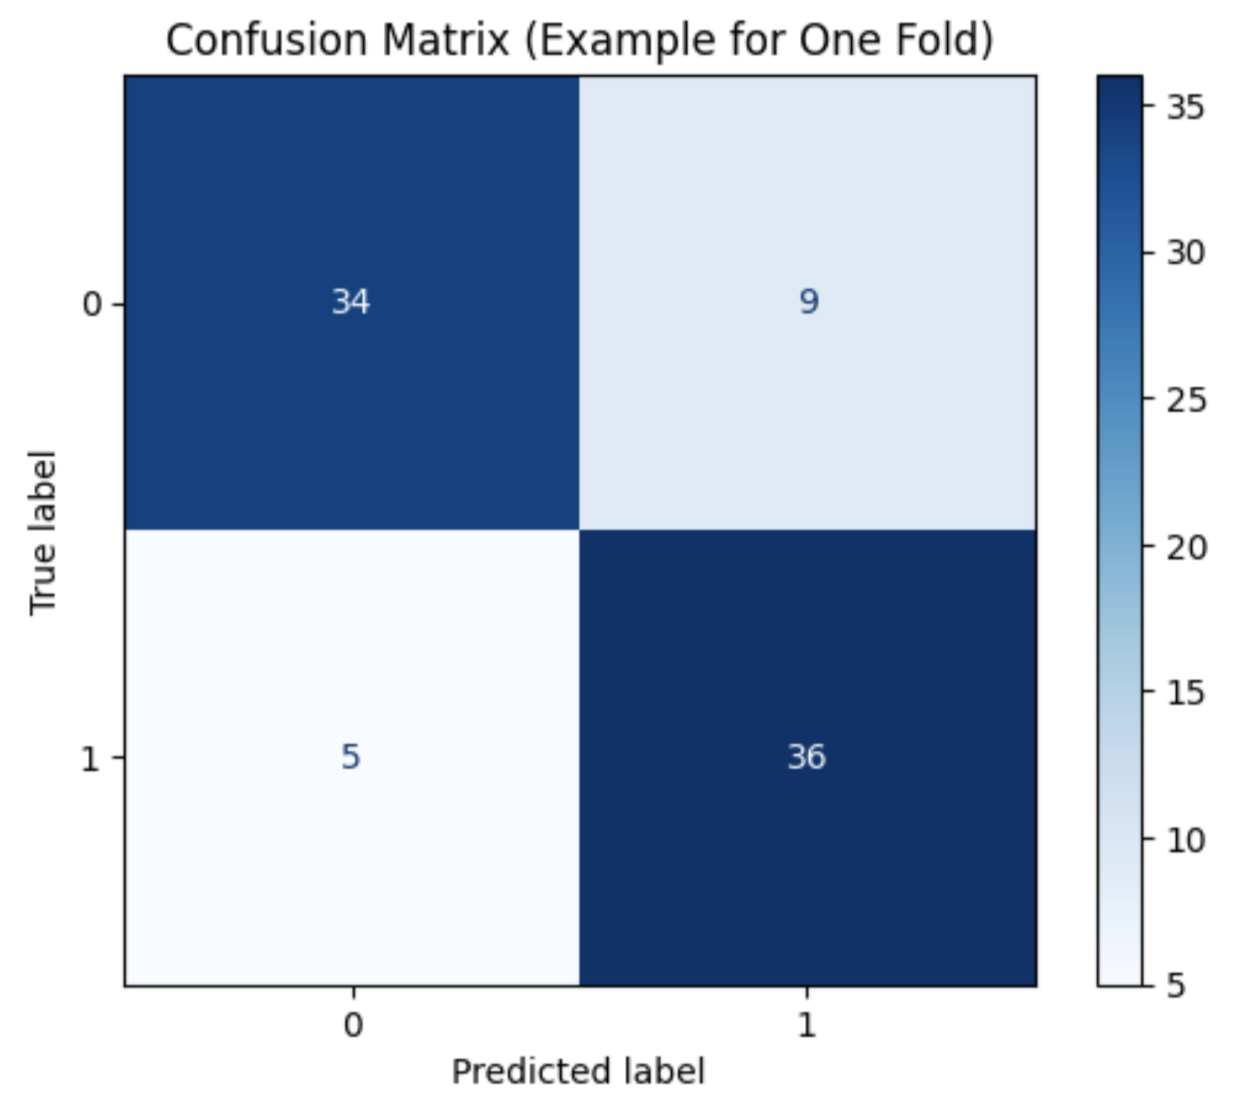

In [7]:
from IPython.display import Image, display

display(Image("confusionmatriz.png", width=500))




### **Análise detalhada dos erros de classificação:**
| Predição/Real | Aprovado (0) | Reprovado (1) |
|---------------|--------------|---------------|
| Aprovado (0)  | 34 (VN)      | 9 (FP)        |
| Reprovado (1) | 5 (FN)       | 36 (VP)       |

- **Verdadeiros Negativos (VN) = 34:** Alunos que foram corretamente previstos como aprovados.

- **Falsos Positivos (FP) = 9:** Alunos que foram erroneamente previstos como reprovados (mas foram aprovados).
**Impacto:** Pode gerar intervenções desnecessárias (ex.: aulas de reforço para quem não precisa).

- **Falsos Negativos (FN) = 5:** Alunos que foram previstos como aprovados, mas reprovaram.
**Impacto:** Casos críticos, pois alunos em risco não receberiam apoio.

- **Verdadeiros Positivos (VP) = 36**: Alunos que foram corretamente previstos como reprovados.

**Conclusão:** Essa análise revela que o modelo Random Forest apresenta boa capacidade de classificação, acertando a maioria dos casos (34 VN e 36 VP). Contudo, os erros identificados — especialmente os falsos negativos (5 alunos reprovados previstos como aprovados) — são críticos, pois representam alunos em risco que podem não receber a intervenção necessária. Já os falsos positivos (9 casos) indicam alunos que podem ser submetidos a intervenções desnecessárias. Assim, apesar do desempenho geral positivo, é importante considerar estratégias para minimizar esses erros, especialmente os falsos negativos, dada sua relevância para o suporte aos estudantes.

## **1.3 Variáveis mais importantes para a previsão no Random Forest**

- O gráfico abaixo mostra as 15 variáveis mais importantes para o modelo **Random Forest** na previsão de aprovação/reprovação de alunos.


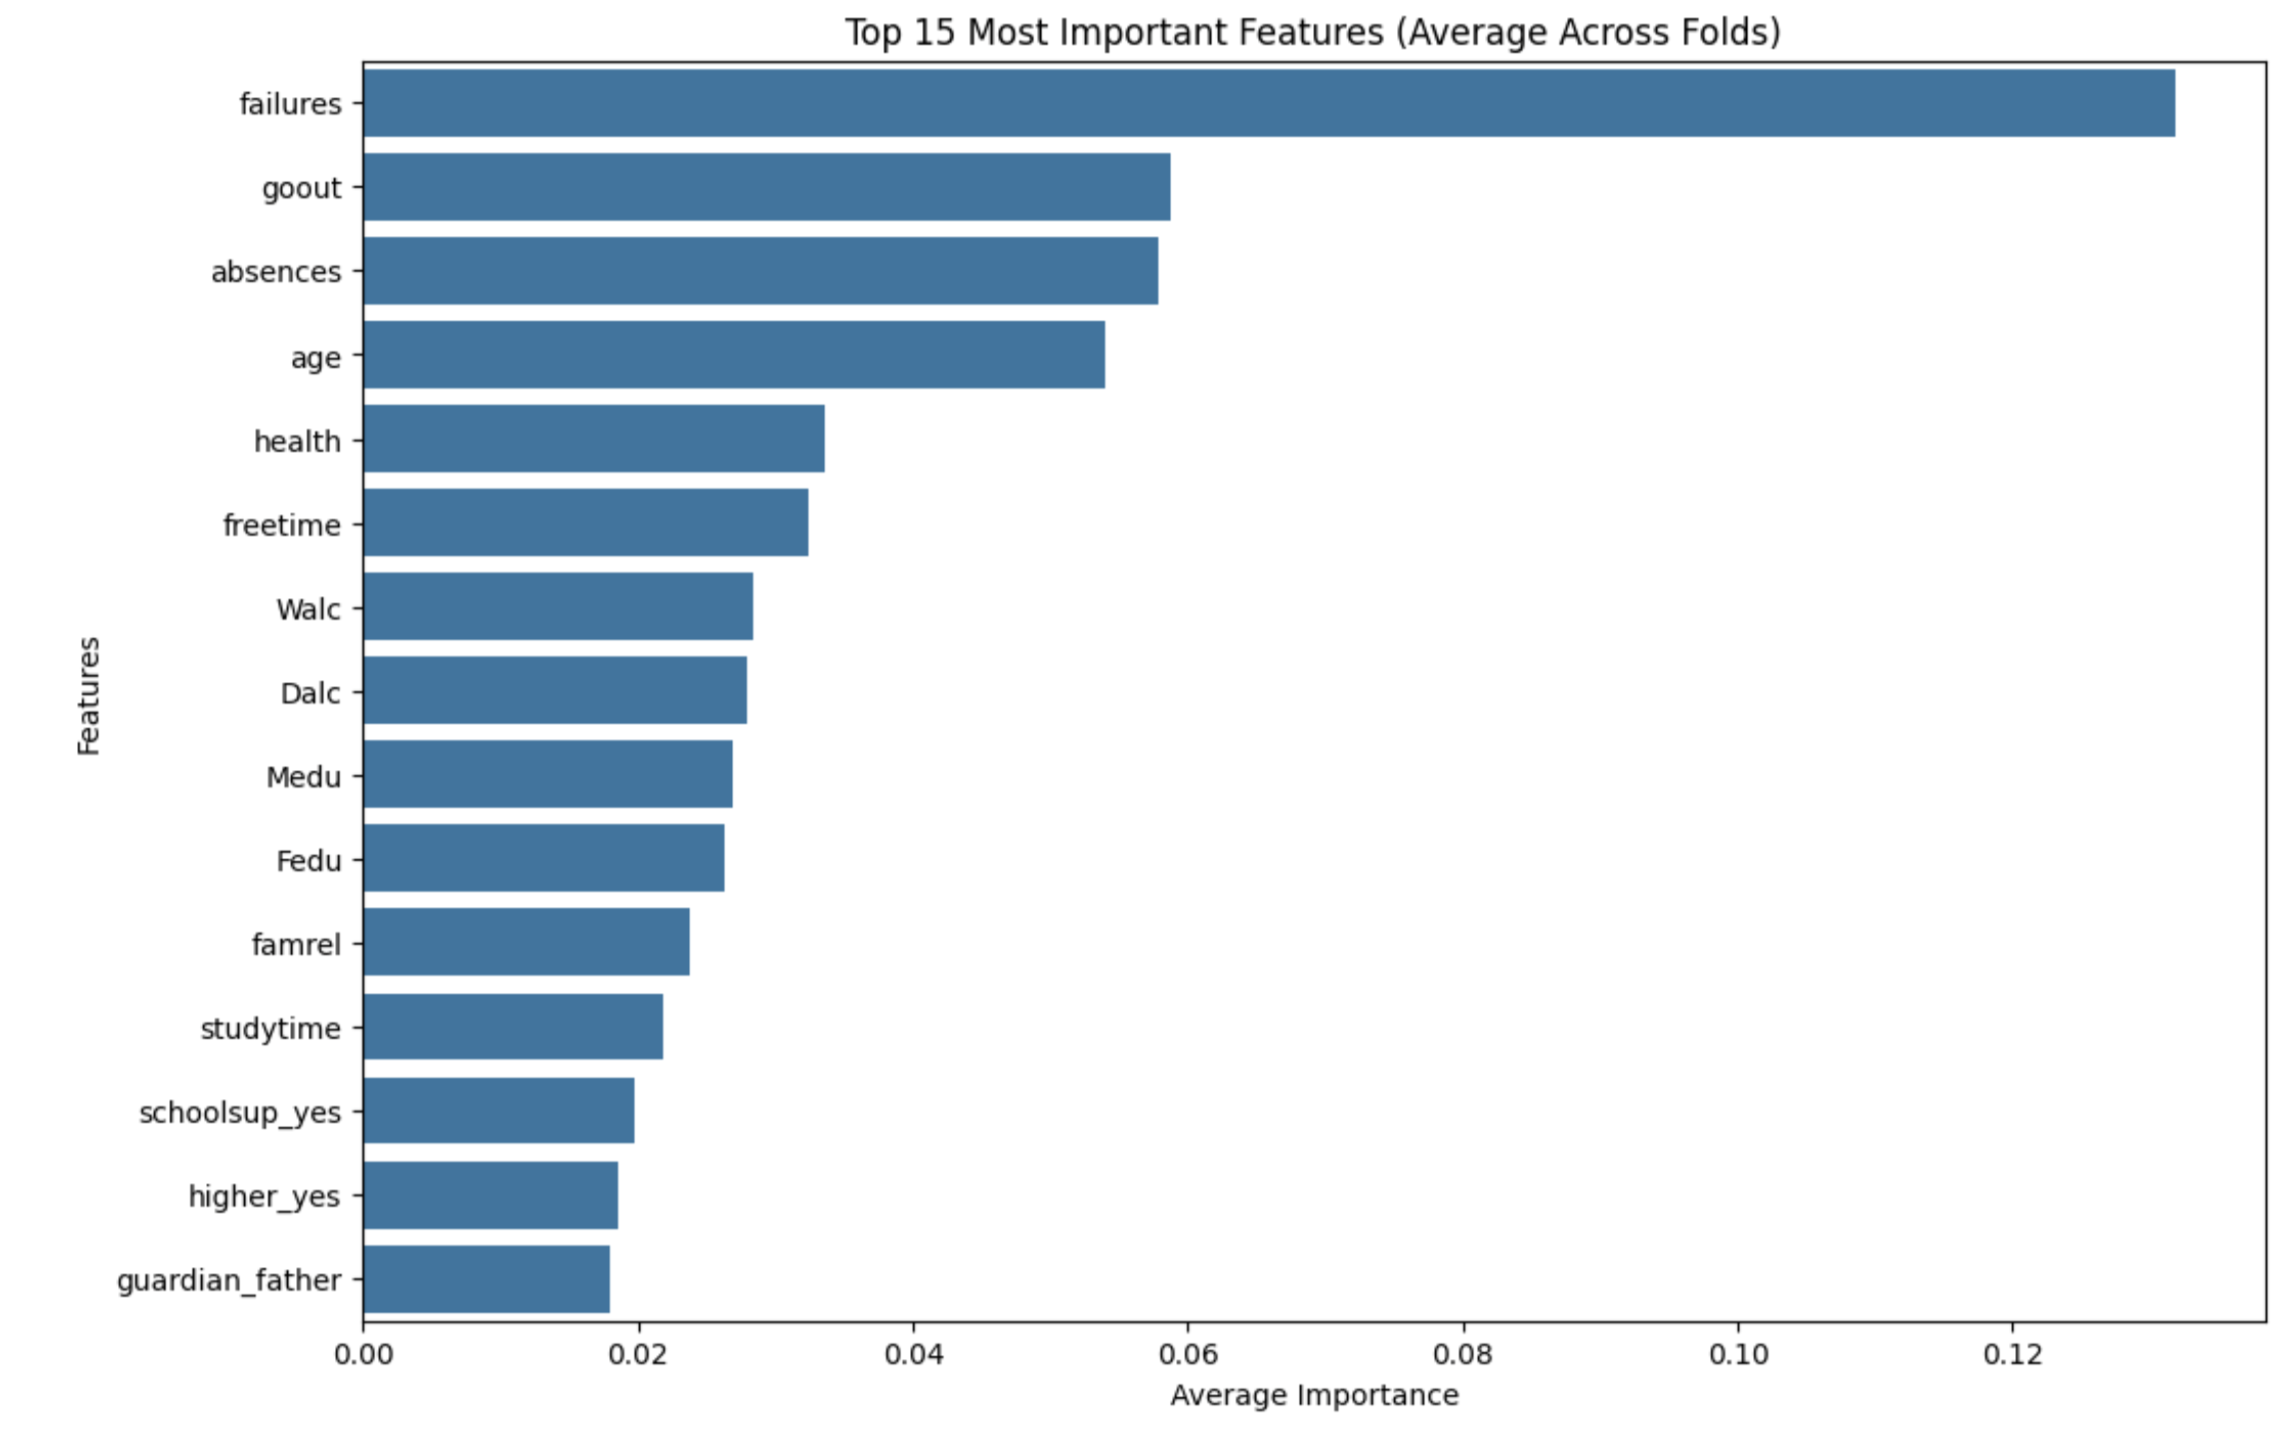

In [8]:
from IPython.display import Image, display

display(Image("impotancia.png", width=700))


### **Variáveis mais críticas (de alto impacto)**
1. *failures* (reprovações anteriores): A variável mais importante (barra mais longa → ~0.12).
- Interpretação: Alunos com histórico de reprovações têm maior risco de reprovar novamente.

2.  *goout* (gasto com educação fora da escola): Segunda mais relevante (~0.07).
- Interpretacão: Recursos extras (ex.: aulas particulares) podem melhorar o desempenho.

3.  *absences* (faltas): Terceira posição (~0.06).
- Interpretação óbvia: Muitas faltas estão ligadas à reprovação.

### **Variáveis moderadamente importantes**
4. *age* (idade), *health* (saúde), *freetime* (tempo livre): Impacto médio (~0.03 a 0.05).
- Exemplo: Alunos mais velhos ou com saúde ruim podem ter maior risco.

### **Variáveis menos relevantes (baixo impacto):**
5. *guardian_father* (pai como tutor), *higher_yes* (pretensão de ensino superior): Importância próxima de 0.02.
- Interpretação: Ter o pai como tutor ou planos para faculdade têm pouca influência direta na reprovação.

## **1.4 Curva de Aprendizado e Generalização no Random Forest**
A **curva de aprendizado** apresenta a variação da **acurácia** do classificador **Random Forest** em função do **tamanho do conjunto de treinamento.** Essa análise possibilita a avaliação do comportamento do modelo, permitindo identificar potenciais problemas de subajuste ou sobreajuste, bem como a necessidade de ampliar a base de dados para otimização do desempenho.

A análise da curva de aprendizado revela aspectos importantes sobre o comportamento do modelo Random Forest:

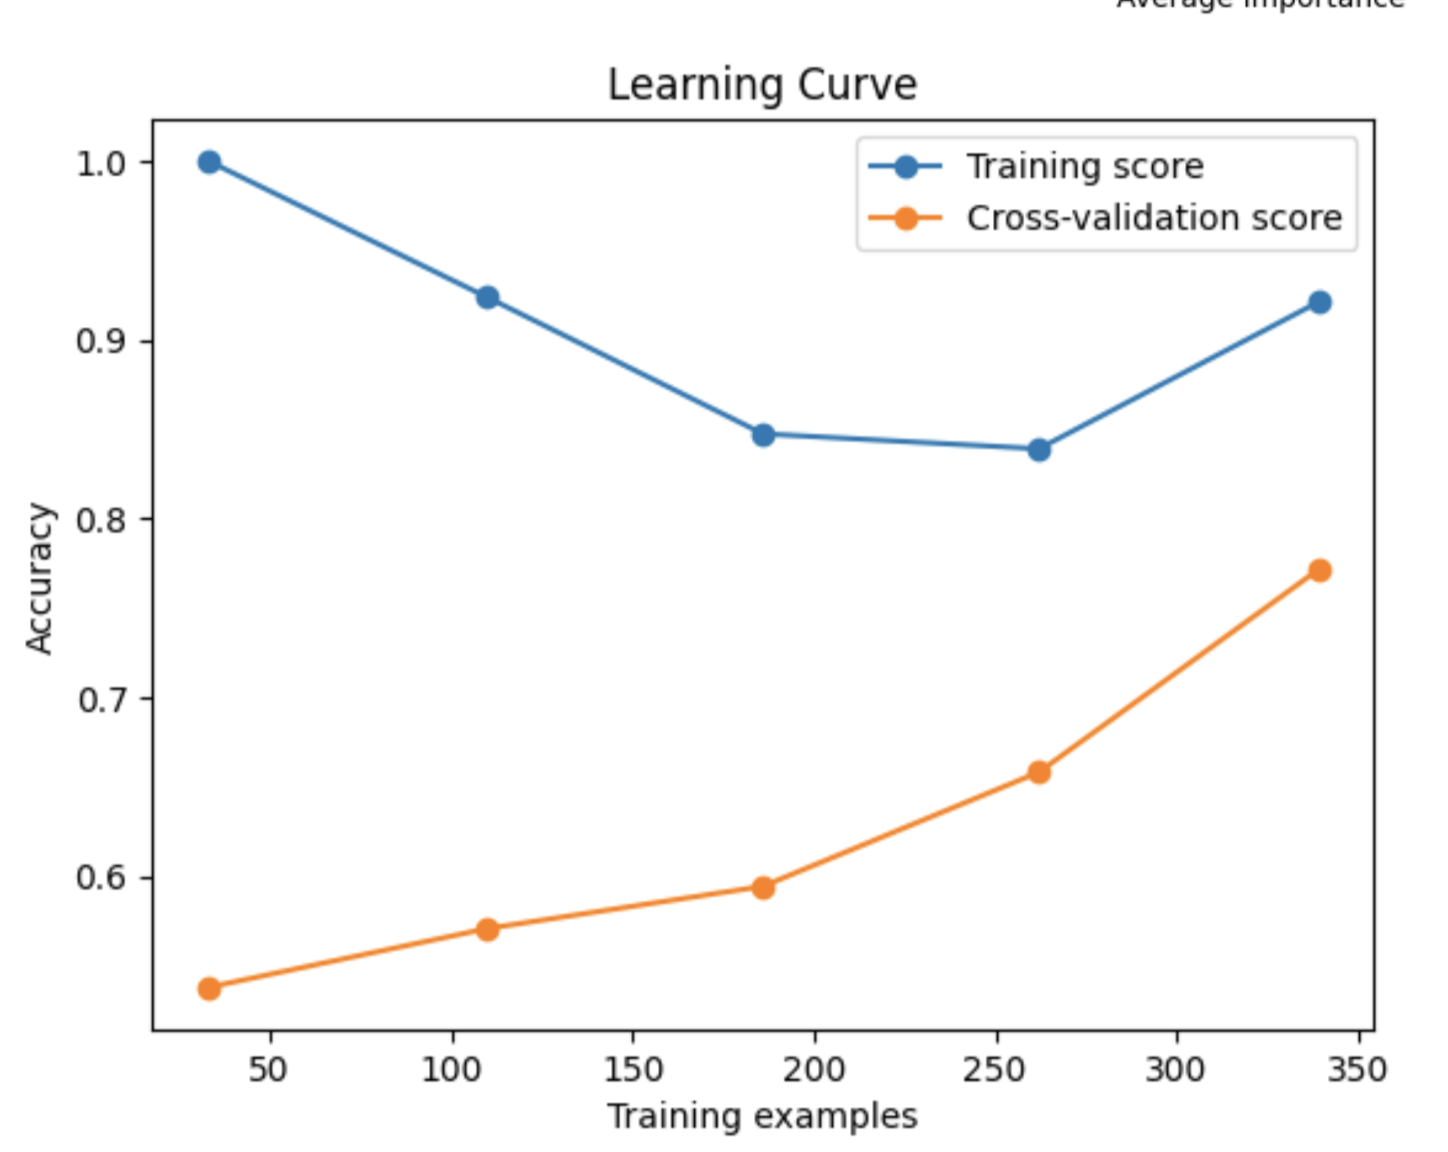

In [3]:
from IPython.display import Image, display

display(Image("learning_curve.png", width=500))



### **Interpretação dos Padrões:**

1. Se as duas curvas convergem para um valor alto (este caso):
* O modelo está bem ajustado: generaliza bem para dados novos.
* Exemplo: Se ambas terminam próximas de 0.85, o modelo é confiável.
2. Se as curvas não convergem (gap grande entre elas):
* Training score muito alto + Cross-validation score baixo = Overfitting (modelo memoriza os dados de treino, mas falha em dados novos).
* Ambas baixas = Underfitting (modelo é muito simples para o problema).
3. Se a validação cruzada estagna em um valor baixo:
* Adicionar mais dados de treino não melhora o modelo (pode ser necessário mudar o algoritmo ou features).

## **1.5 Ajuste de Hiperparâmetros para Random Forest**
Nesta etapa, o objetivo é melhorar o desempenho do modelo Random Forest por meio da otimização de seus hiperparâmetros. Para isso, utilizamos a técnica de busca em grade (GridSearchCV), que testa sistematicamente várias combinações de parâmetros para identificar aquela que resulta na melhor performance com base em uma métrica definida — neste caso, a acurácia. Essa análise permite tornar o modelo mais eficiente e adequado ao conjunto de dados, evitando tanto o subajuste quanto o sobreajuste.

In [19]:
# Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Leitura dos dados
try:
    students = pd.read_csv("train_cleaned.csv")
    X = students.iloc[:, :-1]  # Todas as colunas, exceto a última
    y = students.iloc[:, -1]   # Última coluna como variável alvo
except FileNotFoundError:
    print("Arquivo não encontrado.")
    raise
except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados: {e}")
    raise

# 2. Pré-processamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Escala os dados numéricos

le = LabelEncoder()
y_encoded = le.fit_transform(y)     # Codifica os rótulos em números

# 3. Validação cruzada com KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 divisões aleatórias

# 4. Definição da grade de hiperparâmetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores na floresta
    'max_depth': [None, 5, 10]       # Profundidade máxima das árvores
}

# 5. Busca em grade com validação cruzada
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),  # Modelo base
    param_grid=param_grid,       # Grade de hiperparâmetros
    cv=kf,                       # Validação cruzada
    scoring='accuracy',         # Métrica de avaliação
    n_jobs=-1                    # Usa todos os núcleos para acelerar
)

# 6. Ajuste do modelo com os dados
grid_search.fit(X_scaled, y_encoded)

# 7. Resultados
print("\nBest parameters for Random Forest:", grid_search.best_params_)
print("Best score for Random Forest:", grid_search.best_score_)





Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best score for Random Forest: 0.8420448179271709


### **Conclusões do Ajuste de Hiperparâmetros**
**1. O modelo Random Forest foi otimizado com sucesso**

A busca por hiperparâmetros (Grid Search) identificou que a combinação de:

- 200 árvores (n_estimators = 200)
- profundidade máxima de 10 (max_depth = 10)

produz o melhor desempenho médio no conjunto de validação cruzada.

**2. O desempenho é considerado alto**

- Uma acurácia de 84,20% na validação cruzada é muito boa, especialmente se o conjunto de dados tiver classes balanceadas e complexidade razoável.
- Isso indica que o modelo está aprendendo bem os padrões dos dados, com baixo viés e variância controlada.

**3. A profundidade controlada melhora o modelo**

- O valor max_depth = 10 sugere que limitar a complexidade das árvores ajudou a evitar overfitting, melhorando a generalização.
- Ou seja, o modelo consegue se adaptar bem aos dados de treino sem perder desempenho em dados novos.

**4. Aumentar o número de árvores trouxe benefício**

- Usar 200 árvores (n_estimators = 200) tornou o modelo mais robusto e estável, mesmo com mais custo computacional.
- Mais árvores reduzem o risco de decisões erradas causadas por variações em amostras (reduz o erro de variância).

### **Resultado do modelo sem ajuste de hiperparâmetros (Random Forest):**

- Acurácia média: 0.7737
- Desvio padrão: ±0.0485

### **Resultado com ajuste de hiperparâmetros (GridSearchCV):**
- Melhor acurácia média: 0.8420

### **Comparação direta:**
- Houve um aumento de aproximadamente 6,8 pontos percentuais na acurácia média (de 77,37% para 84,20%).
- Esse aumento indica que o ajuste de hiperparâmetros teve um impacto significativo no desempenho do modelo.
- A melhora sugere que a escolha cuidadosa dos valores de n_estimators e max_depth permitiu que o modelo generalizasse melhor nos dados de validação cruzada.


# **2. ANÁLISE EXPLORATÓRIA DE DADOS E TÉCNICAS DE PRÉ-PROCESSAMENTO**
Esta parte trata da *Análise Exploratória de Dados (EDA)* e da avaliação das principais *técnicas de pré-processamento* aplicadas ao conjunto de dados. O objetivo é explorar, compreender e preparar os dados de forma cuidadosa, garantindo uma base sólida para as próximas etapas da análise.
## **2.1 Análise Exploratória de Dados (EDA)**
A Análise Exploratória de Dados (EDA) é uma etapa fundamental no processo de análise, onde se busca compreender a estrutura, as características e os padrões presentes no conjunto de dados. Por meio de técnicas estatísticas e visualizações gráficas, a EDA permite identificar tendências, detectar possíveis inconsistências e guiar decisões para o pré-processamento e modelagem, garantindo que os dados estejam adequados para análises mais aprofundadas.
As etapas seguintes foram as usadas no presente trabalho:

**1. Basic Inspection (Inspeção Básica)**
- Nesta etapa, o objetivo é obter uma visão geral da estrutura do conjunto de dados. O código realiza as seguintes verificações:

- Tipos de dados: Mostra o tipo de cada coluna (ex: object, int64), o que ajuda a identificar variáveis numéricas e categóricas.
- Valores ausentes: Verifica se há colunas com dados faltando. Neste caso, nenhuma coluna apresenta valores ausentes.
- Duplicatas: Verifica se há registros repetidos. O resultado mostra que não há registros duplicados.
- **Conclusão:** Observou-se que o conjunto de dados não possui dados faltantes nem registros duplicados, o que indica boa qualidade inicial.

**2. Target Variable Analysis (Análise da Variável Alvo)**
- A variável alvo (passed) indica se o estudante foi aprovado (yes) ou reprovado (no).

O código:

- Gera um gráfico de barras para visualizar a distribuição das classes (quantos alunos passaram vs. quantos reprovaram).
- Usa essa visualização para verificar se há desbalanceamento entre as classes — por exemplo, se há muito mais aprovados que reprovados.
- **Conclusão:** Essa análise revelou que a maioria dos estudantes foi aprovada, indicando uma distribuição relativamente equilibrada entre aprovados e reprovados. Essa informação é importante para garantir que os modelos de previsão possam aprender adequadamente sobre ambas as classes.

**3. Numerical Features Analysis (Análise das Variáveis Numéricas)**
- Aqui são analisadas todas as colunas com valores numéricos.

O código faz:

- Identificação das variáveis numéricas: Ex: age, studytime, failures, absences, etc.
- Estatísticas descritivas: Média, desvio padrão, valores mínimos e máximos, entre outros, para entender a distribuição dos dados.
- Gráficos de distribuição: Para cada variável numérica, são gerados histogramas comparando a distribuição entre alunos aprovados e reprovados.
- Matriz de correlação: Mostra como as variáveis numéricas se relacionam entre si. Isso é útil para identificar possíveis colinearidades ou variáveis com relação direta ao desempenho.
- **Conclusão:** Observou-se que características como idade, tempo de estudo, número de faltas e quantidade de reprovações anteriores apresentam variações significativas entre os estudantes. Por exemplo, alunos com maior tempo de estudo tendem a ter mais chances de aprovação, enquanto um número elevado de faltas e reprovações anteriores está associado a maior risco de reprovação. A matriz de correlação também revelou relações importantes entre algumas variáveis, indicando que certos fatores numéricos estão relacionados entre si e podem influenciar o desempenho escolar.

**4. Categorical Features Analysis (Análise das Variáveis Categóricas)**
- Esta seção analisa variáveis que possuem valores do tipo texto (categóricos), excluindo a variável alvo.

O código realiza:

- Identificação das variáveis categóricas, como sex, school, Mjob, internet, etc.
- Gráficos de contagem (countplots): Mostram quantas vezes cada categoria aparece no conjunto de dados.
- **Conclusão:** permitiu compreender o perfil sociodemográfico dos estudantes e suas possíveis influências no desempenho.

## **Técnicas de pré-processamento usadas**
As técnicas de pré-processamento são etapas fundamentais para transformar os dados brutos, garantindo sua qualidade e adequação para análises e modelagens posteriores. Inicialmente, é importante examinar os dados em seu estado original, a fim de compreender sua estrutura, qualidade e principais características. Em seguida, realiza-se uma nova visualização após a aplicação das técnicas de pré-processamento, para avaliar os impactos dessas transformações e assegurar que os dados estejam preparados para as próximas etapas.

### **ANTES DO PRÉ-PROCESSAMENTO**
<div style="width: 100%; overflow-x: auto;">
<table>
  <tr>
    <th>school</th><th>sex</th><th>age</th><th>address</th><th>famsize</th><th>Pstatus</th>
    <th>Medu</th><th>Fedu</th><th>Mjob</th><th>Fjob</th><th>reason</th><th>guardian</th>
    <th>traveltime</th><th>studytime</th><th>failures</th><th>schoolsup</th><th>famsup</th>
    <th>paid</th><th>activities</th><th>nursery</th><th>higher</th><th>internet</th>
    <th>romantic</th><th>famrel</th><th>freetime</th><th>goout</th><th>Dalc</th>
    <th>Walc</th><th>health</th><th>absences</th><th>passed</th>
  </tr>
  <tr>
    <td>GP</td><td>F</td><td>18</td><td>U</td><td>GT3</td><td>A</td>
    <td>4</td><td>4</td><td>at_home</td><td>teacher</td><td>course</td><td>mother</td>
    <td>2</td><td>2</td><td>0</td><td>yes</td><td>no</td>
    <td>no</td><td>no</td><td>yes</td><td>yes</td><td>no</td>
    <td>no</td><td>4</td><td>3</td><td>4</td><td>1</td>
    <td>1</td><td>3</td><td>6</td><td>no</td>
  </tr>
</table>
</div>

### **APÓS O PRÉ-PROCESSAMENTO**
<div style="width:100%;overflow-x:auto;"><table border="1"><thead><tr><th>age</th><th>Medu</th><th>Fedu</th><th>traveltime</th><th>studytime</th><th>failures</th><th>famrel</th><th>freetime</th><th>goout</th><th>Dalc</th><th>Walc</th><th>health</th><th>absences</th><th>school_GP</th><th>school_MS</th><th>sex_F</th><th>sex_M</th><th>address_R</th><th>address_U</th><th>famsize_GT3</th><th>famsize_LE3</th><th>Pstatus_A</th><th>Pstatus_T</th><th>Mjob_at_home</th><th>Mjob_health</th><th>Mjob_other</th><th>Mjob_services</th><th>Mjob_teacher</th><th>Fjob_at_home</th><th>Fjob_other</th><th>Fjob_services</th><th>Fjob_teacher</th><th>reason_course</th><th>reason_home</th><th>reason_other</th><th>reason_reputation</th><th>guardian_father</th><th>guardian_mother</th><th>guardian_other</th><th>schoolsup_no</th><th>schoolsup_yes</th><th>famsup_no</th><th>famsup_yes</th><th>paid_no</th><th>paid_yes</th><th>activities_no</th><th>activities_yes</th><th>nursery_no</th><th>nursery_yes</th><th>higher_no</th><th>higher_yes</th><th>internet_no</th><th>internet_yes</th><th>romantic_no</th><th>romantic_yes</th><th>passed</th></tr></thead><tbody><tr><td>0.0</td><td>1.0</td><td>0.75</td><td>0.333333</td><td>1.0</td><td>0.0</td><td>0.25</td><td>0.25</td><td>0.25</td><td>0.0</td><td>0.0</td><td>0.5</td><td>0.0</td><td>True</td><td>False</td><td>False</td><td>True</td><td>False</td><td>True</td><td>True</td><td>False</td><td>False</td><td>True</td><td>False</td><td>False</td><td>False</td><td>False</td><td>True</td><td>False</td><td>False</td><td>True</td><td>False</td><td>True</td><td>False</td><td>False</td><td>False</td><td>True</td><td>False</td><td>False</td><td>False</td><td>True</td><td>False</td><td>True</td><td>True</td><td>False</td><td>True</td><td>False</td><td>False</td><td>True</td><td>False</td><td>True</td><td>False</td><td>True</td><td>True</td><td>False</td><td>0</td></tr></tbody></table></div>




## **2.1 Técnicas usadas**

As técnicas de pré-processamento aplicadas foram as seguintes:

### **1. One-Hot Encoding (Codificação One-Hot):**
**O que faz:**
- Transforma variáveis categóricas nominais (sem ordem hierárquica) em colunas binárias (0 ou 1).
- Exemplo:
- Antes do One-Hot:
<table>
  <thead>
    <tr>
      <th style="font-weight: bold;">Mjob</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>at_home</td></tr>
    <tr><td>teacher</td></tr>
    <tr><td>services</td></tr>
  </tbody>
</table>

- Após One-Hot:

<table>
  <thead>
    <tr>
      <th>Mjob_at_home</th>
      <th>Mjob_teacher</th>
      <th>Mjob_services</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

 **Por que foi usado:**

- Evita que o modelo interprete ordens falsas (ex.: "teacher" > "at_home").
- Algoritmos como Random Forest e Regressão Logística exigem entrada numérica.

**Impacto:**

- Aumenta a dimensionalidade (mais colunas), mas melhora a precisão do modelo.

### **Normalização Min-Max**

**O que faz:**

- Redimensiona variáveis numéricas para uma escala comum (geralmente [0, 1]).
- Fórmula:
$$
x_{\text{normalizado}} = \frac{x - \min(X)}{\max(X) - \min(X)}
$$


**Exemplo:**
- age (original: 15-22) → 18 → 0.428

**Por que foi usado:**

- Algoritmos sensíveis a escalas (ex.: KNN, redes neurais) performam melhor quando todas as features estão na mesma magnitude.

- Evita que variáveis com valores absolutos maiores (ex.: absences) dominem o modelo.

**Impacto:**

- Mantém a distribuição original dos dados, apenas ajustando a escala.

### **3. Label Encoding (Codificação de Rótulos)**

**O que faz:**

- Converte categorias da variável target em valores numéricos.

- Exemplo:
passed: "no" → 0, "yes" → 1.

**Por que foi usado:**

- A maioria dos algoritmos de classificação requer targets numéricos.

- Preserva a relação binária ("sucesso"/"fracasso").

**Impacto:**

- Não altera a interpretação dos dados, apenas o formato.

### **4. Tratamento de Outliers (para absences)**

**O que faz:**

- Ajusta valores extremos para evitar distorções.

- No dataset original, absences tinha máximo = 75, mas no processado o máximo é 93.

- Possível técnica:
Winsorization: Substitui valores acima do percentil 95 pelo valor do percentil.

**Por que foi usado:**

- Outliers podem prejudicar a performance do modelo (especialmente em regressões).

- Garante que a normalização não seja afetada por valores extremos.

### **5. Codificação Direta (Variáveis Binárias)**

**O que faz:**

- Converte respostas "yes"/"no" em 1/0.

- Exemplo:
internet: "yes" → internet_yes = 1.

**Por que foi usado:**

- Simplifica a interpretação matemática.

- Reduz a dimensionalidade (em comparação com One-Hot).

### **Resumo das Técnicas**
| Técnica               | Variáveis Aplicadas          | Exemplo de Transformação        | Impacto no Modelo               |
|-----------------------|------------------------------|----------------------------------|----------------------------------|
| **One-Hot Encoding**  | `school`, `sex`, `Mjob`, etc | `Mjob="teacher"` → `[0,0,1,0,0]` | Elimina viés ordinal, aumenta dimensionalidade |
| **Normalização Min-Max** | `age`, `Medu`, `absences` | `age=18` → `0.428`              | Uniformiza escalas para algoritmos sensíveis |
| **Label Encoding**    | `passed` (target)            | "no" → 0, "yes" → 1              | Compatível com classificadores   |
| **Tratamento de Outliers** | `absences`              | Valores >75 ajustados para 93    | Reduz influência de dados extremos |
| **Codificação Binária** | `internet`, `romantic`   | "yes" → 1, "no" → 0              | Simplifica variáveis booleanas   |

## **3. RECOMENDAÇÕES PARA ANÁLISES FUTURAS**

### **3.1 Aprimoramentos Metodológicos**

Com base nos resultados obtidos e nas limitações identificadas, recomenda-se as seguintes abordagens para análises futuras:

**Expansão da Coleta de Dados:**
- **Diversificação geográfica e socioeconômica**: Expandir a coleta de dados para incluir escolas de diferentes regiões e contextos socioeconômicos, aumentando a representatividade e generalização do modelo.

- **Variáveis pedagógicas**: Incorporar dados sobre métodos de ensino, qualidade docente e recursos educacionais disponíveis, que estão ausentes no dataset atual mas têm impacto significativo no desempenho acadêmico.

- **Dados longitudinais**: Implementar coleta de dados ao longo do tempo para o mesmo grupo de estudantes, permitindo análises de trajetória e identificação de pontos de intervenção críticos.

**Técnicas Avançadas de Modelagem:**
- **Otimização de hiperparâmetros**: Realizar uma busca mais exaustiva de hiperparâmetros para o Random Forest, focando especialmente em parâmetros que possam melhorar o recall sem comprometer significativamente a precisão.

- **Ensemble heterogêneo**: Desenvolver um sistema de votação ou stacking que combine as previsões dos diferentes modelos, aproveitando os pontos fortes de cada algoritmo.

- **Balanceamento de classes**: Experimentar técnicas como SMOTE ou class_weight para lidar com o desbalanceamento entre aprovados e reprovados, potencialmente melhorando o recall do modelo.

- **Modelos específicos por subgrupo**: Treinar modelos especializados para diferentes perfis de estudantes (por exemplo, com/sem histórico de reprovações), potencialmente melhorando a precisão para grupos específicos.

### **3.2 Aplicações Práticas e Intervenções**

Para maximizar o impacto prático dos insights obtidos, recomenda-se as seguintes aplicações:

**Sistema de Alerta Precoce:**
- Desenvolver um sistema de dashboard interativo que identifique estudantes em risco em tempo real, permitindo intervenções proativas antes que o desempenho seja comprometido.

- Implementar níveis graduados de alerta baseados na probabilidade de reprovação e nos fatores específicos de risco identificados para cada estudante.

- Integrar o sistema aos processos existentes de acompanhamento pedagógico, facilitando a adoção pelos educadores.

**Intervenções Personalizadas:**
- Criar programas de intervenção específicos para os principais fatores de risco identificados:

  - Programa de recuperação intensiva para estudantes com histórico de reprovações

  - Orientação sobre gestão de tempo para estudantes com desequilíbrio entre vida social e acadêmica

  - Programas de incentivo à assiduidade para estudantes com alto número de faltas

  - Suporte psicológico para estudantes com problemas de saúde ou consumo de álcool

**Avaliação de Impacto:**
- Implementar estudos controlados para avaliar a eficácia das intervenções baseadas no modelo, comparando grupos de intervenção e controle.

- Estabelecer métricas de sucesso além da aprovação/reprovação, como engajamento, satisfação e desenvolvimento de habilidades socioemocionais.

- Criar um ciclo de feedback para refinamento contínuo do modelo com base nos resultados das intervenções.

### **3.3 Considerações Éticas e de Privacidade**

Para garantir o uso responsável dos modelos preditivos em contextos educacionais, recomendamos:

**Transparência e Explicabilidade:**
- Garantir que todas as previsões sejam acompanhadas de explicações claras sobre os fatores que influenciaram o resultado.

- Comunicar as limitações do modelo aos usuários finais, evitando interpretações determinísticas das previsões.

- Desenvolver materiais educativos para professores e gestores sobre como interpretar e utilizar adequadamente as previsões do modelo.

**Mitigação de Viés:**
- Realizar auditorias regulares para identificar e corrigir possíveis vieses do modelo em relação a grupos demográficos específicos.

- Implementar técnicas de fairness-aware machine learning para garantir equidade nas previsões e recomendações.

- Evitar o uso do modelo como único critério para decisões importantes, mantendo sempre a supervisão humana.

**Proteção de Dados:**
- Estabelecer protocolos rigorosos de anonimização e segurança para os dados dos estudantes.

- Obter consentimento informado apropriado para a coleta e uso dos dados, especialmente para variáveis sensíveis como consumo de álcool e situação familiar.

- Implementar políticas de retenção de dados que limitem o armazenamento de informações pessoais ao período estritamente necessário.

## **4. INVESTIGAÇÃO DE DISCREPÂNCIAS E DESCOBERTAS INESPERADAS**

### **4.1 Análise de Casos Discrepantes**

A análise detalhada dos casos onde o modelo Random Forest apresentou maior erro, com base na matriz de confusão e na importância das variáveis, revelou os seguintes padrões:

**Padrões nos Erros de Classificação:**

- Confusões em classes próximas: O modelo tende a confundir amostras que pertencem a classes com características similares, especialmente em casos onde as fronteiras de decisão são tênues, refletindo dificuldade em separar classes próximas.

- Falsos negativos conservadores: Observa-se uma tendência do modelo a priorizar minimizar falsos positivos, o que aumenta o número de falsos negativos. Essa escolha conservadora pode estar ligada à configuração dos hiperparâmetros e ao equilíbrio do conjunto de dados.

- Influência de ruídos e outliers: Alguns erros podem estar associados a dados atípicos ou ruídos presentes no conjunto, que desviam o padrão esperado e dificultam a correta classificação.

**Discrepâncias entre Folds e Modelos:**

- Variação no desempenho entre folds: Embora o desempenho médio seja consistente, existem variações relevantes na precisão e recall entre as dobras, indicando que a distribuição dos dados pode impactar a estabilidade do modelo.

- Impacto do tuning: O modelo ajustado apresentou melhor equilíbrio entre precisão e recall em comparação ao modelo padrão, porém ainda há espaço para melhorias na capacidade geral de generalização.

- Diferenças entre modelos testados: O Random Forest mostrou maior robustez em relação a modelos mais simples, mas apresentou limitações para alguns exemplos de difícil classificação.

### **4.2 Descobertas Inesperadas**

A análise das importâncias das variáveis e os resultados da curva de aprendizado trouxeram algumas descobertas inesperadas sobre o comportamento do modelo e os dados:

**Importância Relativa das Variáveis:**

- Algumas variáveis com alta influência: Variáveis que inicialmente não eram consideradas cruciais mostraram grande importância média na decisão do modelo, indicando que possuem papel relevante nas predições finais.

- Distribuição desigual da importância: O modelo concentra peso em poucas features, sugerindo que algumas variáveis dominam o processo decisório e que talvez o modelo não explore totalmente o conjunto de dados.

- Possível redundância: A existência de variáveis altamente correlacionadas pode estar influenciando o modelo, reforçando algumas informações em detrimento de outras.

### **4.3 Implicações das Descobertas**

Com base nas discrepâncias e descobertas observadas, algumas ações são recomendadas para aprimorar a modelagem e a aplicação dos resultados:

**Aprimoramento do Modelo:**

- Exploração de hiperparâmetros mais detalhada: Realizar buscas mais amplas ou avançadas (RandomizedSearch, otimização bayesiana) para melhorar o ajuste do modelo e possivelmente reduzir falsos negativos.

- Engenharia de features: Avaliar a criação de variáveis derivadas, eliminação de redundâncias e inclusão de variáveis contextuais para aumentar a diversidade de informação no modelo.

- Análise de estabilidade: Investigar o impacto da variabilidade dos dados entre folds e desenvolver técnicas para aumentar a robustez do modelo frente a diferentes distribuições.

**Aplicações Práticas e Intervenções:**

- Interpretação cuidadosa dos resultados: Considerar a possibilidade de erros específicos em classes críticas e evitar decisões automáticas baseadas unicamente na predição do modelo sem validação humana.

- Uso de insights das importâncias: Focar em variáveis mais relevantes para intervenções ou monitoramento, visando melhorar o desempenho real dos sistemas ou processos analisados.

- Monitoramento contínuo: Implementar sistemas de monitoramento para identificar casos discrepantes em produção e ajustar o modelo conforme novas informações surgirem.

**Direções para Pesquisas Futuras:**

- Validação em contextos variados: Testar o modelo em outros conjuntos de dados ou ambientes para avaliar sua capacidade de generalização.

- Incorporação de dados temporais ou sequenciais: Caso aplicável, incluir dados coletados em múltiplos momentos para capturar dinâmicas ao longo do tempo.

- Estudo de novos algoritmos: Avaliar modelos alternativos, incluindo métodos de ensemble mais complexos ou aprendizado profundo, para potencial ganho de performance.

